# Supervised Machine Learning models

### Prepartion of datasets

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IBM/lung_cancer_all_dummified.xlsx')
df

,Study ID,Cancer Type Detailed,Sex,Age,Smoking Status,Mutation Count,Fraction Genome Altered,Overall Survival Status,Overall Survival (Months)
0,1,1,0,70,0,0,0.4565,0,0.00
1,1,1,0,81,0,0,0.0000,0,23.98
2,1,1,0,67,0,289,0.2221,0,50.03
3,1,1,1,79,0,0,0.2362,1,3.98
4,1,1,0,68,0,1272,0.0854,0,19.94
...,...,...,...,...,...,...,...,...,...
2559,3,1,1,75,1,211,0.2382,1,43.91
2560,3,1,0,63,1,101,0.5420,1,8.59
2561,3,1,1,71,1,216,0.4405,1,11.18
2562,3,2,1,68,1,109,0.0598,0,4.00


In [4]:
df.columns

Index(['Study ID', 'Cancer Type Detailed', 'Sex', 'Age', 'Smoking Status',
       'Mutation Count', 'Fraction Genome Altered', 'Overall Survival Status',
       'Overall Survival (Months)'],
      dtype='object')

This code uses `Overall Survival Months` as the dependent variable.

In [20]:
#Prepare X and y datasets
X=df[['Cancer Type Detailed', 'Sex', 'Age', 'Smoking Status','Mutation Count', 'Fraction Genome Altered']]
y=df['Overall Survival (Months)']
print(y[0:5])
X.head(5)

0    0
1    0
2    0
3    1
4    0
Name: Overall Survival Status, dtype: int64


,Cancer Type Detailed,Sex,Age,Smoking Status,Mutation Count,Fraction Genome Altered
0,1,0,70,0,0,0.4565
1,1,0,81,0,0,0.0000
2,1,0,67,0,289,0.2221
3,1,1,79,0,0,0.2362
4,1,0,68,0,1272,0.0854


In [21]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()

,Cancer Type Detailed,Sex,Age,Smoking Status,Mutation Count,Fraction Genome Altered
254,1,0,88,1,0,0.3667
1892,1,0,63,1,301,0.0028
1496,1,1,63,1,346,0.7082
300,1,1,42,1,0,0.4716
2510,1,0,71,1,83,0.4446


In [9]:
#Use StandardScaler to transform data
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=['Cancer Type Detailed', 'Sex', 'Age', 'Smoking Status','Mutation Count', 'Fraction Genome Altered'])
X_test_scaled=pd.DataFrame(X_test_scaled, columns=['Cancer Type Detailed', 'Sex', 'Age', 'Smoking Status','Mutation Count', 'Fraction Genome Altered'])

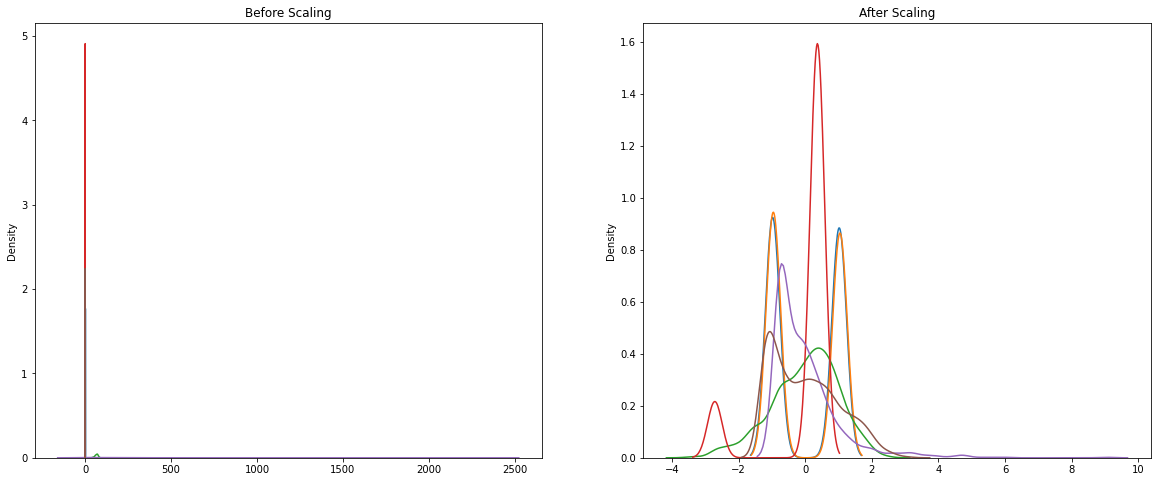

In [10]:
#Plot the difference before and after scaling
import seaborn as sns
fig3=plt.figure(figsize=(20,8))
ax1=fig3.add_subplot(121)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Cancer Type Detailed'])
sns.kdeplot(X_train['Sex'])
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train['Smoking Status'])
sns.kdeplot(X_train['Mutation Count'])
sns.kdeplot(X_train['Fraction Genome Altered'])
plt.xlabel(" ")
ax2=fig3.add_subplot(122)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Cancer Type Detailed'])
sns.kdeplot(X_train_scaled['Sex'])
sns.kdeplot(X_train_scaled['Age'])
sns.kdeplot(X_train_scaled['Smoking Status'])
sns.kdeplot(X_train_scaled['Mutation Count'])
sns.kdeplot(X_train_scaled['Fraction Genome Altered'])
plt.xlabel(" ")
plt.show()

Looking at the graphs, scaling is necessary.

### Models and cross validation

In [7]:
#Import cross validation functions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
from sklearn.model_selection import RepeatedKFold
rkf=RepeatedKFold(n_splits=5, n_repeats=5)

In [22]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))
print("KNN Cross Validation Kfold Scores:{}".format(np.mean((cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=kfold)))))
print("KNN Cross Validation Repeatedkfold Scores:{}".format(np.mean((cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=rkf)))))

Training set score: 0.34
Test set score: -0.01
KNN Cross Validation Kfold Scores:-0.08266969992626283
KNN Cross Validation Repeatedkfold Scores:-0.0457949704458616


In [19]:
#KNN Regressor+GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': range(1, 30, 2)}
grid=GridSearchCV(KNeighborsRegressor(), param_grid, cv=rkf)
grid.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))

Best mean cross-validation score: -0.031850679524860405
Best parameters: {'n_neighbors': 29}
Test set score: -0.02


In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print("Linear Regression Cross Validation Kfold Scores:{}".format(np.mean((cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kfold)))))
print("Linear Regression Cross Validation Repeatedkfold Scores:{}".format(np.mean((cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=rkf)))))

Training set score: 0.01
Test set score: -0.00
Linear Regression Cross Validation Kfold Scores:0.004673756046832178
Linear Regression Cross Validation Repeatedkfold Scores:0.004165539344789435


In [17]:
#Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format((ridge.score(X_test_scaled, y_test))))
print("Ridge Cross Validation Kfold Scores:{}".format(np.mean((cross_val_score(Ridge(), X_train_scaled, y_train, cv=kfold)))))
print("Ridge Cross Validation Repeatedkfold Scores:{}".format(np.mean((cross_val_score(Ridge(), X_train_scaled, y_train, cv=rkf)))))

Training set score: 0.01
Test set score: -0.00
Ridge Cross Validation Kfold Scores:0.004680121439756357
Ridge Cross Validation Repeatedkfold Scores:0.0026577872210687926


In [23]:
#Ridge+GridSearchCV
param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 100]}
gridridge=GridSearchCV(Ridge(), param_grid, cv=rkf)
gridridge.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(gridridge.best_score_))
print("Best parameters: {}".format(gridridge.best_params_))
print("Test set score: {:.2f}".format(gridridge.score(X_test_scaled, y_test)))

Best mean cross-validation score: 0.050023408806932096
Best parameters: {'alpha': 100}
Test set score: 0.03


In [18]:
#Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_!= 0)))
print("Lasso Cross Validation Kfold Scores:{}".format(np.mean((cross_val_score(Lasso(), X_train_scaled, y_train, cv=kfold)))))
print("Lasso Cross Validation Repeatedkfold Scores:{}".format(np.mean((cross_val_score(Lasso(), X_train_scaled, y_train, cv=rkf)))))

Training set score: 0.01
Test set score: 0.00
Number of features used: 3
Lasso Cross Validation Kfold Scores:0.001359928509111219
Lasso Cross Validation Repeatedkfold Scores:0.0018923441713842902


In [24]:
#Lasso+GridSearchCV
param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 100]}
gridlasso=GridSearchCV(Lasso(max_iter=100000), param_grid, cv=rkf)
gridlasso.fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(gridlasso.best_score_))
print("Best parameters: {}".format(gridlasso.best_params_))
print("Test set score: {:.2f}".format(gridlasso.score(X_test_scaled, y_test)))

Best mean cross-validation score: 0.04849095393508987
Best parameters: {'alpha': 0.01}
Test set score: 0.03


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(forest.score(X_train_scaled, y_train))) 
print("Test set score: {:.2f}".format(forest.score(X_test_scaled, y_test))) 
print("Lasso Cross Validation Kfold Scores:{}".format(np.mean((cross_val_score(RandomForestRegressor(), X_train_scaled, y_train, cv=kfold)))))
print("Lasso Cross Validation Repeatedkfold Scores:{}".format(np.mean((cross_val_score(RandomForestRegressor(), X_train_scaled, y_train, cv=rkf)))))

Training set score: 0.91
Test set score: 0.45
Lasso Cross Validation Kfold Scores:0.2246485569600928
Lasso Cross Validation Repeatedkfold Scores:0.2557202552989382


In [37]:
#Random Forest+GridSearchCV
forest_param_grid={'n_estimators': [1, 5, 10, 15, 20, 50, 100, 200], 'max_depth':[50, 100, 150, 200]}
forest_grid=GridSearchCV(RandomForestRegressor(), forest_param_grid).fit(X_train_scaled, y_train)
print("Best mean cross-validation score: {}".format(forest_grid.best_score_))
print("Best Parameter: {}".format(forest_grid.best_params_))
print("Test Set Score: {:.2f}".format(forest_grid.score(X_test_scaled, y_test)))

Best mean cross-validation score: 0.2376118409579898
Best Parameter: {'max_depth': 100, 'n_estimators': 100}
Test Set Score: 0.44


I would think that the model results are not that well based on the models I've tested. Similar results are for the Overall Survial Status as well.

I read one of the files other teammembers have created, and it seems that all other columns except Status is included as independent variables, and I think Overall Survival Status and Time length are highly correlated, so we probably need to choose one in the analysis and omit the other. 